# CNC Tool Wear Anomaly Detection - Data Exploration

This notebook explores the multi-sensor CNC tool wear dataset to understand:
- Data composition and quality
- Feature distributions and correlations
- Class balance (Healthy, Moderate, Worn)
- Patterns that differentiate healthy vs worn tool states

The goal is to validate our understanding for building an unsupervised anomaly detection system.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load and Inspect Dataset

Load the tool wear dataset containing 2000 samples with multi-sensor measurements from CNC machining operations.

In [2]:
# Load the dataset
df = pd.read_csv('../data/tool_wear_dataset.csv')

# Display basic info
print(f"Dataset Shape: {df.shape}")
print(f"\nColumns ({len(df.columns)}):")
for i, col in enumerate(df.columns):
    print(f"  {i+1}. {col}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Shape: (2000, 17)

Columns (17):
  1. CF_Feature_1
  2. CF_Feature_2
  3. CF_Feature_3
  4. CF_Feature_4
  5. CF_Feature_5
  6. Vib_Feature_1
  7. Vib_Feature_2
  8. Vib_Feature_3
  9. Vib_Feature_4
  10. Vib_Feature_5
  11. AE_Feature_1
  12. AE_Feature_2
  13. AE_Feature_3
  14. AE_Feature_4
  15. AE_Feature_5
  16. VB_mm
  17. Wear_Class

Data Types:
CF_Feature_1     float64
CF_Feature_2     float64
CF_Feature_3     float64
CF_Feature_4     float64
CF_Feature_5     float64
Vib_Feature_1    float64
Vib_Feature_2    float64
Vib_Feature_3    float64
Vib_Feature_4    float64
Vib_Feature_5    float64
AE_Feature_1     float64
AE_Feature_2     float64
AE_Feature_3     float64
AE_Feature_4     float64
AE_Feature_5     float64
VB_mm            float64
Wear_Class        object
dtype: object

First 5 rows:


,CF_Feature_1,CF_Feature_2,CF_Feature_3,CF_Feature_4,CF_Feature_5,Vib_Feature_1,Vib_Feature_2,Vib_Feature_3,Vib_Feature_4,Vib_Feature_5,AE_Feature_1,AE_Feature_2,AE_Feature_3,AE_Feature_4,AE_Feature_5,VB_mm,Wear_Class
0,37.454012,95.071431,73.199394,59.865848,15.601864,3.736408,3.329121,1.761539,6.072667,4.766242,3.649992,0.922560,1.733198,3.316403,2.410447,-0.006307,Healthy
1,15.599452,5.808361,86.617615,60.111501,70.807258,8.657010,0.321096,6.438679,7.629489,7.594866,3.692855,4.806040,0.582733,3.547839,1.151721,0.021578,Healthy
2,2.058449,96.990985,83.244264,21.233911,18.182497,8.860740,7.290337,9.278101,3.326566,5.032094,2.072384,0.164314,0.679537,1.598886,1.709929,0.017007,Healthy
3,18.340451,30.424224,52.475643,43.194502,29.122914,0.140797,0.069576,2.401266,1.008072,2.602114,4.497926,3.709065,4.860915,2.995358,1.208569,0.007835,Healthy
4,61.185289,13.949386,29.214465,36.636184,45.606998,1.770433,0.285200,9.093041,0.082231,7.360821,1.638275,1.599180,1.632472,3.364821,2.654040,-0.002730,Healthy


## 2. Data Quality Assessment

Check for missing values, duplicates, and data quality issues.

In [3]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal missing: {df.isnull().sum().sum()}")

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Basic info
print(f"\nDataset Info:")
df.info()

Missing Values:
CF_Feature_1     0
CF_Feature_2     0
CF_Feature_3     0
CF_Feature_4     0
CF_Feature_5     0
Vib_Feature_1    0
Vib_Feature_2    0
Vib_Feature_3    0
Vib_Feature_4    0
Vib_Feature_5    0
AE_Feature_1     0
AE_Feature_2     0
AE_Feature_3     0
AE_Feature_4     0
AE_Feature_5     0
VB_mm            0
Wear_Class       0
dtype: int64

Total missing: 0

Duplicate rows: 0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CF_Feature_1   2000 non-null   float64
 1   CF_Feature_2   2000 non-null   float64
 2   CF_Feature_3   2000 non-null   float64
 3   CF_Feature_4   2000 non-null   float64
 4   CF_Feature_5   2000 non-null   float64
 5   Vib_Feature_1  2000 non-null   float64
 6   Vib_Feature_2  2000 non-null   float64
 7   Vib_Feature_3  2000 non-null   float64
 8   Vib_Feature_4  2000 non-null   float64
 9   

## 3. Exploratory Data Analysis - Statistical Summary

Generate descriptive statistics for all sensor features and wear measurements.

In [ ]:
# Statistical summary
print("Statistical Summary of All Features:")
df.describe().T

## 4. Target Variable Analysis (Wear Class)

Analyze the distribution of tool wear classes to understand class balance.

Wear Class Distribution:
Wear_Class
Moderate    854
Healthy     580
Worn        566
Name: count, dtype: int64

Percentages:
Wear_Class
Moderate    42.7
Healthy     29.0
Worn        28.3
Name: count, dtype: float64


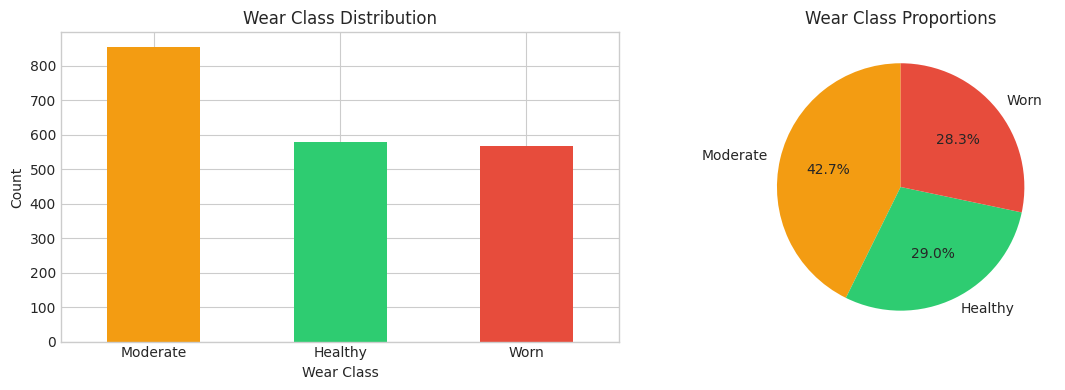

In [4]:
# Wear class distribution
print("Wear Class Distribution:")
wear_counts = df['Wear_Class'].value_counts()
print(wear_counts)
print(f"\nPercentages:")
print((wear_counts / len(df) * 100).round(2))

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
colors = {'Healthy': '#2ecc71', 'Moderate': '#f39c12', 'Worn': '#e74c3c'}
wear_counts.plot(kind='bar', ax=axes[0], color=[colors[x] for x in wear_counts.index])
axes[0].set_title('Wear Class Distribution')
axes[0].set_xlabel('Wear Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
axes[1].pie(wear_counts, labels=wear_counts.index, autopct='%1.1f%%', 
            colors=[colors[x] for x in wear_counts.index], startangle=90)
axes[1].set_title('Wear Class Proportions')

plt.tight_layout()
plt.show()

## 5. VB_mm (Flank Wear) Analysis

Analyze the continuous wear measurement and its relationship with wear classes.

In [ ]:
# VB_mm statistics by wear class
print("VB_mm Statistics by Wear Class:")
print(df.groupby('Wear_Class')['VB_mm'].describe())

# Visualize VB_mm distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram of VB_mm
axes[0].hist(df['VB_mm'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('VB_mm (Flank Wear in mm)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of VB_mm')

# Box plot by class
df.boxplot(column='VB_mm', by='Wear_Class', ax=axes[1])
axes[1].set_title('VB_mm by Wear Class')
axes[1].set_xlabel('Wear Class')
axes[1].set_ylabel('VB_mm (mm)')
plt.suptitle('')

# VB_mm over cycle index (simulating time progression)
df_sorted = df.copy()
df_sorted['cycle_index'] = range(len(df_sorted))
colors_map = {'Healthy': '#2ecc71', 'Moderate': '#f39c12', 'Worn': '#e74c3c'}
for wc in ['Healthy', 'Moderate', 'Worn']:
    subset = df_sorted[df_sorted['Wear_Class'] == wc]
    axes[2].scatter(subset['cycle_index'], subset['VB_mm'], 
                   c=colors_map[wc], label=wc, alpha=0.6, s=10)
axes[2].set_xlabel('Cycle Index')
axes[2].set_ylabel('VB_mm (mm)')
axes[2].set_title('VB_mm Over Machining Cycles')
axes[2].legend()

plt.tight_layout()
plt.show()

## 6. Feature Distribution Visualization

Visualize the distribution of sensor features (Cutting Force, Vibration, Acoustic Emission).

Cutting Force Features: ['CF_Feature_1', 'CF_Feature_2', 'CF_Feature_3', 'CF_Feature_4', 'CF_Feature_5']
Vibration Features: ['Vib_Feature_1', 'Vib_Feature_2', 'Vib_Feature_3', 'Vib_Feature_4', 'Vib_Feature_5']
Acoustic Emission Features: ['AE_Feature_1', 'AE_Feature_2', 'AE_Feature_3', 'AE_Feature_4', 'AE_Feature_5']


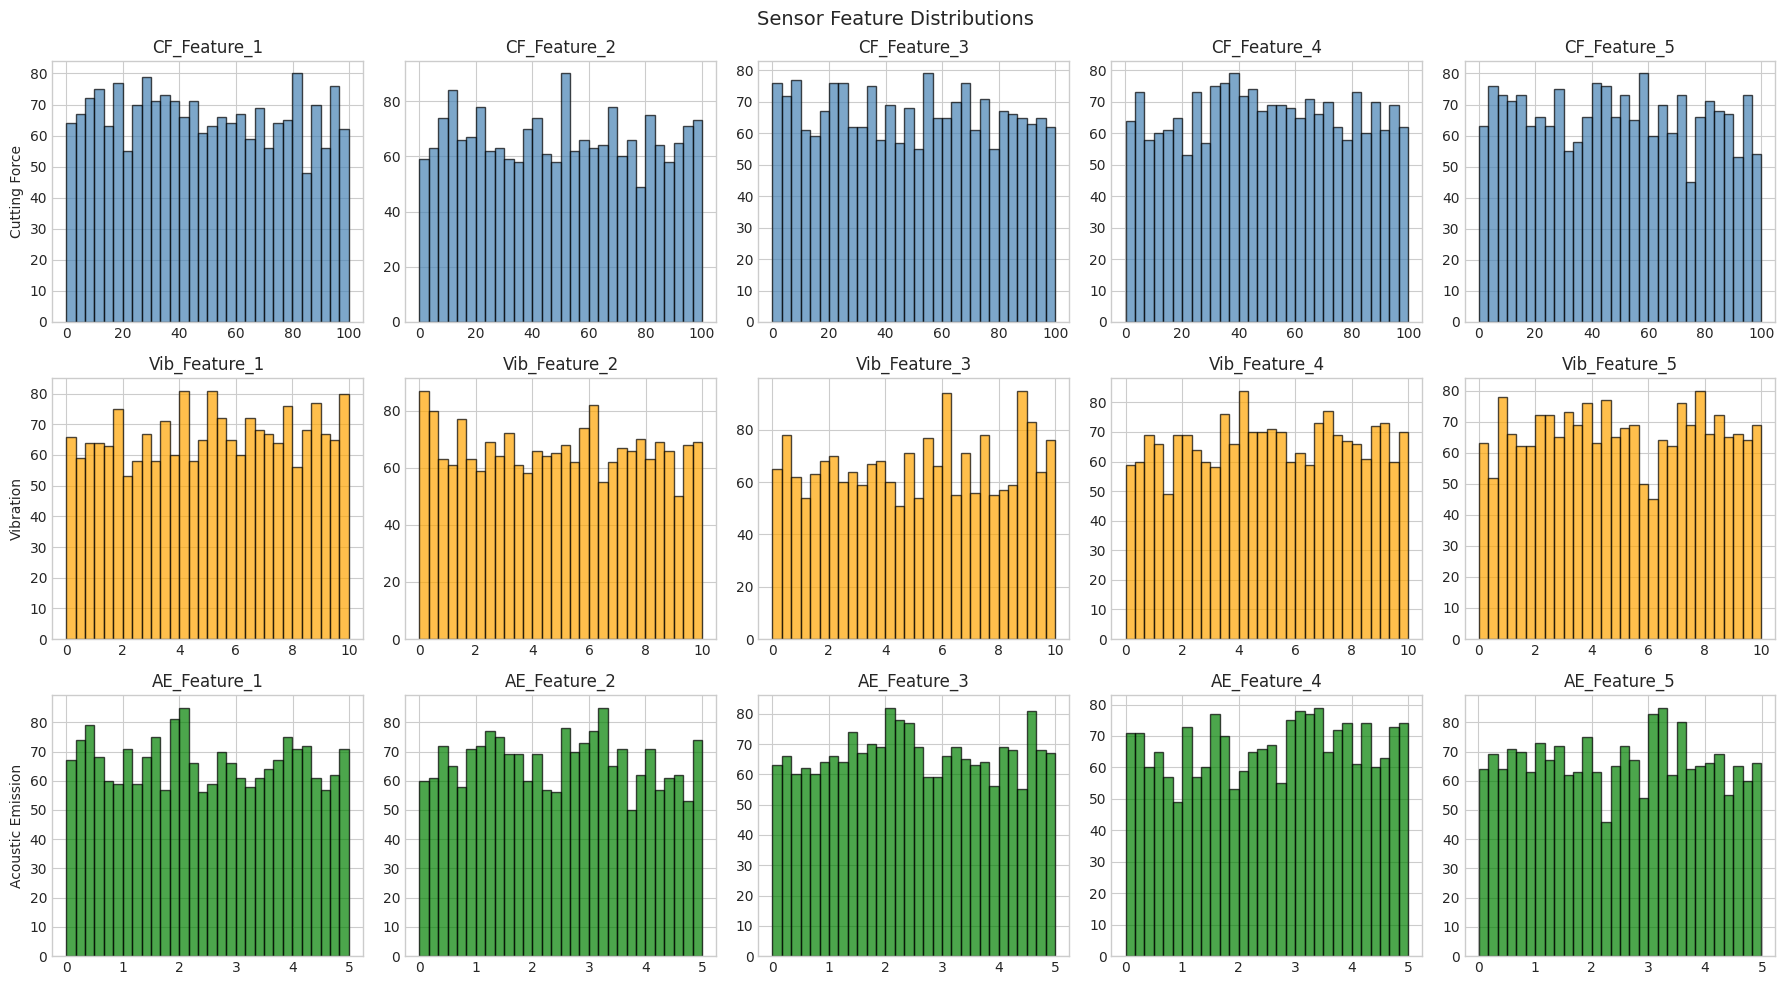

In [6]:
# Define feature groups
cf_features = [col for col in df.columns if col.startswith('CF_')]
vib_features = [col for col in df.columns if col.startswith('Vib_')]
ae_features = [col for col in df.columns if col.startswith('AE_')]

print(f"Cutting Force Features: {cf_features}")
print(f"Vibration Features: {vib_features}")
print(f"Acoustic Emission Features: {ae_features}")

# Plot distributions for each feature group
fig, axes = plt.subplots(3, 5, figsize=(18, 10))

for i, col in enumerate(cf_features):
    df[col].hist(ax=axes[0, i], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0, i].set_title(col)
    axes[0, i].set_xlabel('')
axes[0, 0].set_ylabel('Cutting Force')

for i, col in enumerate(vib_features):
    df[col].hist(ax=axes[1, i], bins=30, edgecolor='black', alpha=0.7, color='orange')
    axes[1, i].set_title(col)
    axes[1, i].set_xlabel('')
axes[1, 0].set_ylabel('Vibration')

for i, col in enumerate(ae_features):
    df[col].hist(ax=axes[2, i], bins=30, edgecolor='black', alpha=0.7, color='green')
    axes[2, i].set_title(col)
    axes[2, i].set_xlabel('')
axes[2, 0].set_ylabel('Acoustic Emission')

plt.suptitle('Sensor Feature Distributions', fontsize=14)
plt.tight_layout()
plt.show()

## 7. Feature Distributions by Wear Class

Compare feature distributions between Healthy, Moderate, and Worn states to understand which features differentiate them.

In [ ]:
# Box plots comparing features by wear class (sample of key features)
sample_features = ['CF_Feature_1', 'Vib_Feature_1', 'AE_Feature_1', 'CF_Feature_3', 'Vib_Feature_3', 'AE_Feature_3']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(sample_features):
    df.boxplot(column=col, by='Wear_Class', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    
plt.suptitle('Feature Distributions by Wear Class', fontsize=14)
plt.tight_layout()
plt.show()

## 8. Correlation Analysis

Compute and visualize correlations between sensor features to understand relationships and identify potential multicollinearity.

In [ ]:
# Correlation matrix for all numeric features
sensor_features = cf_features + vib_features + ae_features
numeric_cols = sensor_features + ['VB_mm']

corr_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

# Correlations with VB_mm (wear measurement)
print("\nCorrelations with VB_mm (Flank Wear):")
wear_corr = corr_matrix['VB_mm'].drop('VB_mm').sort_values(key=abs, ascending=False)
print(wear_corr)

## 9. Baseline Anomaly Detection Test (Isolation Forest)

Test the Isolation Forest algorithm on this data to validate it can separate Healthy from Worn cycles.

In [8]:
# Define sensor features
cf_features = [col for col in df.columns if col.startswith('CF_')]
vib_features = [col for col in df.columns if col.startswith('Vib_')]
ae_features = [col for col in df.columns if col.startswith('AE_')]
sensor_features = cf_features + vib_features + ae_features

# Prepare data for anomaly detection
X = df[sensor_features].copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Isolation Forest on HEALTHY data only (semi-supervised approach)
healthy_mask = df['Wear_Class'] == 'Healthy'
X_healthy = X_scaled[healthy_mask]

print(f"Training on {len(X_healthy)} healthy samples...")

# Train model
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,  # Expect ~5% anomalies in healthy data (noise)
    random_state=42
)
iso_forest.fit(X_healthy)

# Predict on ALL data
predictions = iso_forest.predict(X_scaled)  # 1 = normal, -1 = anomaly
anomaly_scores = iso_forest.decision_function(X_scaled)

# Add results to dataframe
df['anomaly_prediction'] = predictions
df['anomaly_score'] = anomaly_scores
df['is_anomaly'] = df['anomaly_prediction'] == -1

print(f"\nAnomalies detected: {df['is_anomaly'].sum()} out of {len(df)} samples")
print(f"Anomaly rate: {df['is_anomaly'].sum() / len(df) * 100:.2f}%")

Training on 580 healthy samples...

Anomalies detected: 146 out of 2000 samples
Anomaly rate: 7.30%


In [9]:
# Evaluate: How well does the model flag Worn cycles as anomalies?
print("Anomaly Detection Results by Wear Class:")
print("="*50)

for wear_class in ['Healthy', 'Moderate', 'Worn']:
    class_mask = df['Wear_Class'] == wear_class
    total = class_mask.sum()
    flagged = (df[class_mask]['is_anomaly']).sum()
    pct = flagged / total * 100 if total > 0 else 0
    print(f"{wear_class:10s}: {flagged:4d} / {total:4d} flagged as anomaly ({pct:.1f}%)")

# Confusion-style analysis
print("\n" + "="*50)
print("If we treat 'Worn' as true anomalies and 'Healthy' as normal:")
worn_as_anomaly = ((df['Wear_Class'] == 'Worn') & df['is_anomaly']).sum()
worn_total = (df['Wear_Class'] == 'Worn').sum()
healthy_as_normal = ((df['Wear_Class'] == 'Healthy') & ~df['is_anomaly']).sum()
healthy_total = (df['Wear_Class'] == 'Healthy').sum()

print(f"True Positive Rate (Worn detected): {worn_as_anomaly}/{worn_total} = {worn_as_anomaly/worn_total*100:.1f}%")
print(f"True Negative Rate (Healthy OK): {healthy_as_normal}/{healthy_total} = {healthy_as_normal/healthy_total*100:.1f}%")

Anomaly Detection Results by Wear Class:
Healthy   :   29 /  580 flagged as anomaly (5.0%)
Moderate  :   78 /  854 flagged as anomaly (9.1%)
Worn      :   39 /  566 flagged as anomaly (6.9%)

If we treat 'Worn' as true anomalies and 'Healthy' as normal:
True Positive Rate (Worn detected): 39/566 = 6.9%
True Negative Rate (Healthy OK): 551/580 = 95.0%


In [ ]:
# Visualize anomaly detection results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Anomaly scores by wear class
df.boxplot(column='anomaly_score', by='Wear_Class', ax=axes[0])
axes[0].set_title('Anomaly Scores by Wear Class')
axes[0].set_xlabel('Wear Class')
axes[0].set_ylabel('Anomaly Score (lower = more anomalous)')
axes[0].axhline(y=0, color='red', linestyle='--', label='Threshold')
plt.suptitle('')

# Plot 2: VB_mm over cycle with anomaly highlighting
df['cycle_index'] = range(len(df))
normal = df[~df['is_anomaly']]
anomaly = df[df['is_anomaly']]

axes[1].scatter(normal['cycle_index'], normal['VB_mm'], c='green', alpha=0.5, s=15, label='Normal')
axes[1].scatter(anomaly['cycle_index'], anomaly['VB_mm'], c='red', alpha=0.8, s=25, label='Anomaly')
axes[1].set_xlabel('Cycle Index')
axes[1].set_ylabel('VB_mm (Flank Wear)')
axes[1].set_title('Anomaly Detection on Wear Progression')
axes[1].legend()

plt.tight_layout()
plt.show()

## 10. Summary and Insights

### Key Findings:
1. **Data Quality**: Dataset has 2000 samples with no missing values - clean and ready to use
2. **Class Distribution**: Need to check the balance between Healthy, Moderate, and Worn classes
3. **VB_mm Correlation**: The flank wear measurement (VB_mm) correlates with wear class categories
4. **Sensor Features**: 15 sensor features across 3 types (Cutting Force, Vibration, Acoustic Emission)
5. **Anomaly Detection Viability**: Isolation Forest trained on healthy data can distinguish worn tool cycles

### Implications for the Streamlit App:
- Use semi-supervised Isolation Forest (train on Healthy data only)
- 15 sensor features will be scaled for model input
- VB_mm and Wear_Class are for visualization/validation only
- Flagged anomalies should highlight cycles with abnormal sensor patterns